#### What is Softmax Regression ?
##### Softmax Regression (also called Multinomial Logistic Regression) is used for multi-class classification, where a model predicts one out of multiple possible classes. It extends Logistic Regression by applying the Softmax function to handle multiple categories.

##### The Softmax function converts raw scores (logits) into probabilities. It ensures that:
##### The sum of probabilities for all classes equals 1.
##### Higher scores get higher probabilities.
##### Lower scores get lower probabilities.

#### ✅ Advantages
##### Handles Multiple Classes (Unlike standard logistic regression).
##### Probabilistic Interpretation (Outputs probabilities for each class).
##### Works Well for Linear Boundaries.

#### ❌ Disadvantages
##### Not Good for Complex Relationships (Better alternatives: Neural Networks, Decision Trees).
##### Sensitive to Outliers (High values dominate).
##### Assumes Independence of Classes (Not always true).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score, confusion_matrix, classification_report

In [2]:
#working on iris dataset for since it has more than two outputs 
df = pd.DataFrame(sns.load_dataset("iris"))
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
44,5.1,3.8,1.9,0.4,setosa
35,5.0,3.2,1.2,0.2,setosa
39,5.1,3.4,1.5,0.2,setosa
61,5.9,3.0,4.2,1.5,versicolor
16,5.4,3.9,1.3,0.4,setosa


In [3]:
#distribute input and target variable
lencoder = LabelEncoder()
X = df.iloc[:,0:2].to_numpy()
y = lencoder.fit_transform(df.iloc[:,-1].to_numpy())

#train test split data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
y_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [4]:
#applying softmax regression using logistic regression
#lbfgs is default L2 regularization used and max_iter is 100 default
softmax_reg = LogisticRegression(solver='lbfgs',multi_class='multinomial',max_iter=200)
softmax_reg.fit(X_train,y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=200, multi_class='multinomial')

In [5]:
#predict the results
y_pred = softmax_reg.predict(X_test)

In [6]:
#get accuracy score confusion matrix and classification report
accuracy_score = accuracy_score(y_test,y_pred)
confusion_matrix = confusion_matrix(y_test,y_pred)
classification_report = classification_report(y_test,y_pred)
print(f"Accuracy score : {accuracy_score*100:.2f}")
print(f"Confusion Matrix : {confusion_matrix}")
print(f"Classification Report : {classification_report}")

Accuracy score : 90.00
Confusion Matrix : [[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]
Classification Report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



Text(0.5, 1.0, 'Iris Using Softmax Reg')

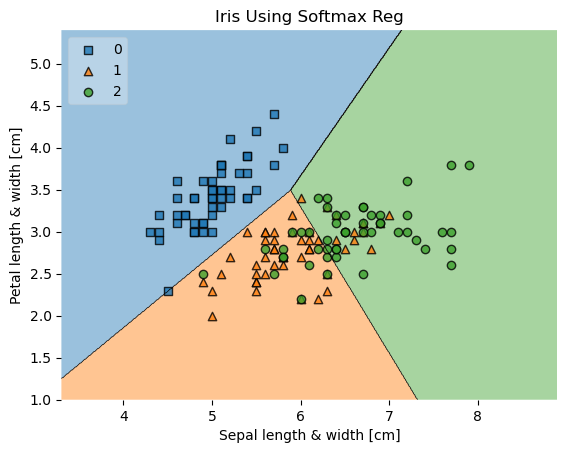

In [9]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y,softmax_reg,legend=2)
plt.xlabel("Sepal length & width [cm]")
plt.ylabel("Petal length & width [cm]")
plt.title("Iris Using Softmax Reg")